In [27]:
import sys
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
font = FontProperties()
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
rcParams['font.family'] = 'sans-serif'
font.set_name('Arial')
font.set_size(9)
import seaborn as sns

Load the data from your file into a DataFrame

In [28]:
data = pd.read_csv("PhenolDimer.dat", delim_whitespace=True, header=None)
# Assuming the first column is sign(λ2)ρ and the second column is RDG (s)
sign_lambda_rho = data[0]
rdg = data[1]

Create the plot

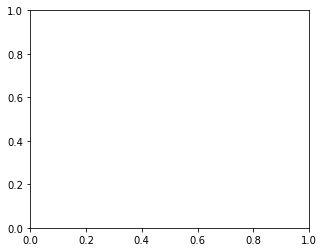

In [29]:
fig, ax = plt.subplots(figsize=(5, 4))

Define the colormap

In [30]:
colors = [(0, 'blue'), (0.5, '#32CD32'), (1, 'red')] 
cmap = LinearSegmentedColormap.from_list("blue_parrot_green_red", colors)

Define normalization for color scale with zero as a central value

In [31]:
norm = mcolors.TwoSlopeNorm(vmin=-0.07, vcenter=-0.0, vmax=0.07)

Define the scatter plot with a diverging colormap and set the vmin, vmax directly in the scatter function

In [32]:
scatter = ax.scatter(sign_lambda_rho, rdg, c=sign_lambda_rho, cmap=cmap, norm=norm, s=5,  marker='o')

Add color bar for reference

In [33]:
cbar = fig.colorbar(scatter, ax=ax)

#### Decimal format for x and y values

In [34]:
formatter1 = ticker.FormatStrFormatter('%1.2f')
formatter2 = ticker.FormatStrFormatter('%1.1f')

#### Set axis limits and axis labels

In [35]:
ax.set_xlim([-0.06, 0.06])
ax.set_ylim([0, 1.0])
ax.set_xlabel(r'sign($\lambda_{2}$)$\rho$ (a.u.)')
ax.set_ylabel('RDG (a.u.)')
ax.xaxis.set_major_formatter(formatter1)
ax.yaxis.set_major_formatter(formatter2)

#### Minor Ticks

In [36]:
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))

Display the plot

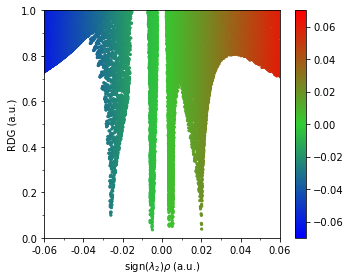

In [37]:
fig.tight_layout()
fig.savefig('Fig1.png',dpi=600)
fig